In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [104]:
df = pd.read_csv('./dataBases/census.csv')
df

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [105]:
np.unique(df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<Axes: xlabel='income', ylabel='count'>

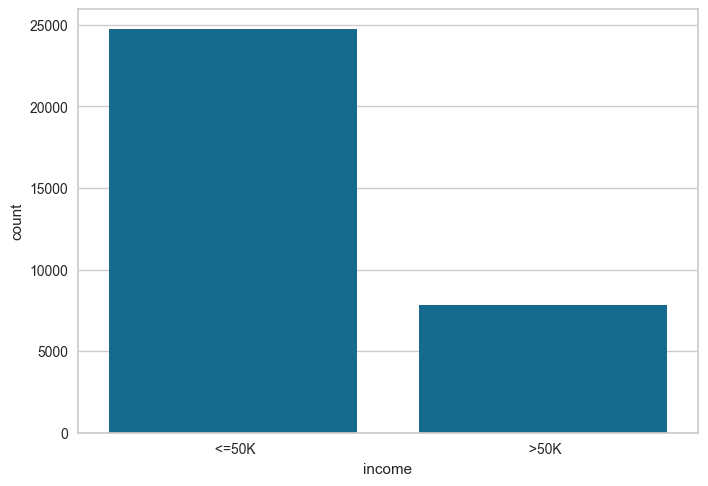

In [106]:
sns.countplot(x = df['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

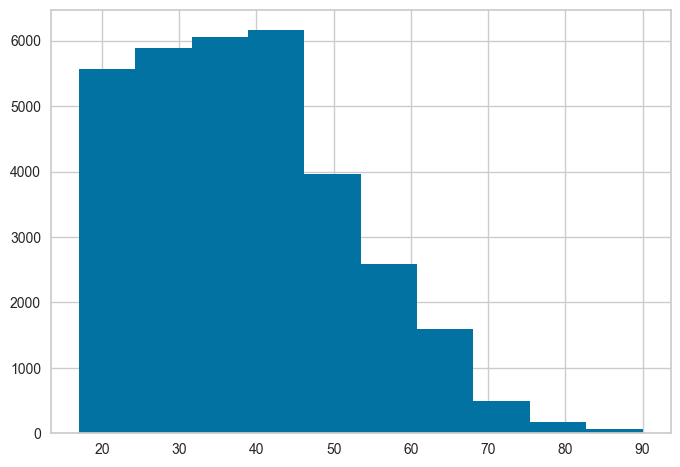

In [107]:
plt.hist(x = df['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

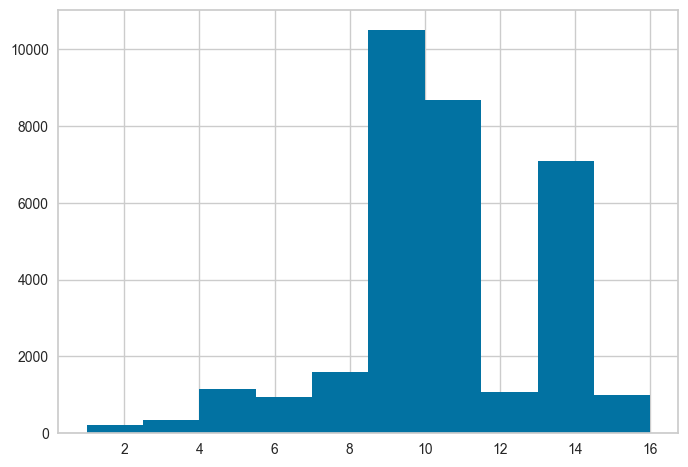

In [108]:
plt.hist(x = df['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

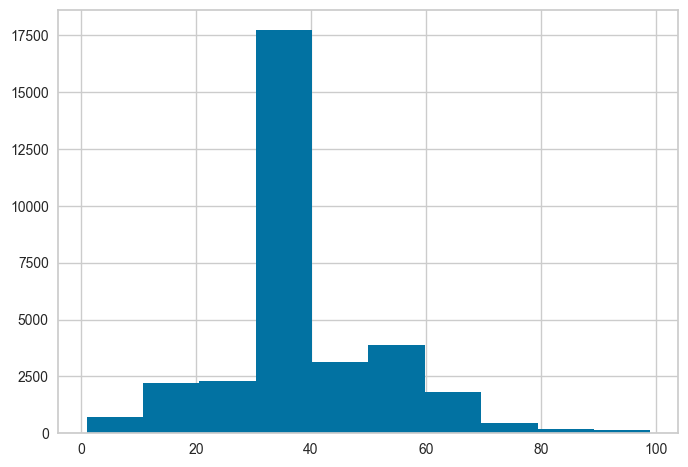

In [109]:
plt.hist(x = df['hour-per-week'])

In [110]:
grafico = px.treemap(df, path=['workclass', 'age'])
grafico.show()

In [111]:
grafico = px.treemap(df, path=['occupation', 'relationship', 'age'])
grafico.show()

In [112]:
grafico = px.parallel_categories(df, dimensions=['occupation', 'relationship'])
grafico.show()

In [113]:
grafico = px.parallel_categories(df, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [114]:
x_census = df.iloc[:,0:14].values
y_census = df.iloc[:, 14].values

In [115]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [116]:
teste = label_encoder_teste.fit_transform(x_census[:,1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [117]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [118]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_ralationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [119]:
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3]) 
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:, 5]) 
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_ralationship.fit_transform(x_census[:, 7]) 
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8]) 
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:, 13])

In [120]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
OneHotEncoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [122]:
x_census = OneHotEncoder_census.fit_transform(x_census)
x_census[0]

<1x108 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [123]:
x_census.shape

(32561, 108)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler(with_mean=False)
x_census = scaler_census.fit_transform(x_census)
x_census[0]

<1x108 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [142]:
from sklearn.model_selection import train_test_split

x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = train_test_split(x_census, y_census, test_size=0.2, random_state=0)

x_census_treinamento.shape, x_census_teste.shape

((26048, 108), (26048,))

In [143]:
from sklearn.naive_bayes import GaussianNB


naive_census = GaussianNB()
naive_census.fit(x_census_treinamento.toarray(), y_census_treinamento)
previsoes = naive_census.predict(x_census_teste.toarray())
previsoes

TypeError: Sparse data was passed for y, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [144]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [145]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento.toarray(), y_census_treinamento)
cm.score(x_census_teste.toarray(), y_census_teste)

TypeError: Sparse data was passed for y, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

<Figure size 200x200 with 0 Axes>

In [146]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.49      4918
        >50K       0.32      0.97      0.48      1595

    accuracy                           0.48      6513
   macro avg       0.64      0.65      0.48      6513
weighted avg       0.81      0.48      0.48      6513



In [147]:
from sklearn.neighbors import KNeighborsClassifier


In [148]:
x_census_treinamento.shape, y_census_treinamento.shape

((26048, 108), (6513, 108))

In [149]:
x_census_teste.shape, y_census_teste.shape

((26048,), (6513,))

In [150]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(x_census_treinamento, x_census_teste)

KNeighborsClassifier(n_neighbors=10)

In [151]:
previsoes = knn_census.predict( x_census_treinamento,y_census_teste)
previsoes

TypeError: KNeighborsClassifier.predict() takes 2 positional arguments but 3 were given